# Exercises XP

## Exercise 1: In-Depth Analysis Of Sales By Category And Sub-Category

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings; warnings.filterwarnings(action = 'ignore')

C:\Users\Acer\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Loading the dataset 
file_path = r'C:\Users\Acer\Desktop\train.csv'
df = pd.read_csv(file_path) 

df.info()
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680
5,6,CA-2015-115812,09/06/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600
6,7,CA-2015-115812,09/06/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.2800
7,8,CA-2015-115812,09/06/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.1520
8,9,CA-2015-115812,09/06/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.5040
9,10,CA-2015-115812,09/06/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,OFF-AP-10002892,Office Supplies,Appliances,Belkin F5C206VTEL 6 Outlet Surge,114.9000


### 1. Traditional DA

Filter data to focus on the specific years 2016 to 2018.
Group by category and sub-category, then calculate average, total sales.
Sort the results and visualize the top 3 sub-categories in each category by sales.

In [3]:
# getting general information about a numeric column
df.Sales.describe()

count     9800.000000
mean       230.769059
std        626.651875
min          0.444000
25%         17.248000
50%         54.490000
75%        210.605000
max      22638.480000
Name: Sales, dtype: float64

In [4]:
# checking for duplicate strings
df.duplicated().sum()

0

In [5]:
print(df['Ship Mode'].value_counts())
print('-----')
print(df['Segment'].value_counts())
print('-----')
print(df['Country'].value_counts())
print('-----')
print(df['Region'].value_counts())
print('-----')
print(df['Category'].value_counts())
print('-----')
print(df['Sub-Category'].value_counts())

Standard Class    5859
Second Class      1902
First Class       1501
Same Day           538
Name: Ship Mode, dtype: int64
-----
Consumer       5101
Corporate      2953
Home Office    1746
Name: Segment, dtype: int64
-----
United States    9800
Name: Country, dtype: int64
-----
West       3140
East       2785
Central    2277
South      1598
Name: Region, dtype: int64
-----
Office Supplies    5909
Furniture          2078
Technology         1813
Name: Category, dtype: int64
-----
Binders        1492
Paper          1338
Furnishings     931
Phones          876
Storage         832
Art             785
Accessories     756
Chairs          607
Appliances      459
Labels          357
Tables          314
Envelopes       248
Bookcases       226
Fasteners       214
Supplies        184
Machines        115
Copiers          66
Name: Sub-Category, dtype: int64


<div style="border:solid green 2px; padding: 20px">
   
- Retail dataset of a global superstore for 4 years.
- It contains 18 columns and 9800 rows. Columns "Order Date" and "Ship Date" have an object type, they need to be converted to datetime type.
- There are missing values only in the Postal Code column, but this column is not important for this analysis.
- In the dataset, the "country" column only has a value of USA, so this column can be deleted. You can also delete the Row ID column, as it is not important for analysis.
- There are no duplicates in the dataset.

In [3]:
# deleting unnecessary columns
df = df.drop(['Country', 'Row ID'], axis=1)

In [4]:
# changing the data type in columns with date
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       9800 non-null   object        
 1   Order Date     9800 non-null   datetime64[ns]
 2   Ship Date      9800 non-null   datetime64[ns]
 3   Ship Mode      9800 non-null   object        
 4   Customer ID    9800 non-null   object        
 5   Customer Name  9800 non-null   object        
 6   Segment        9800 non-null   object        
 7   City           9800 non-null   object        
 8   State          9800 non-null   object        
 9   Postal Code    9789 non-null   float64       
 10  Region         9800 non-null   object        
 11  Product ID     9800 non-null   object        
 12  Category       9800 non-null   object        
 13  Sub-Category   9800 non-null   object        
 14  Product Name   9800 non-null   object        
 15  Sales          9800 n

In [11]:
# check the minimum and maximum dates in the dataset
print(df['Order Date'].min())
print(df['Order Date'].max())

2015-01-02 00:00:00
2018-12-30 00:00:00


In [5]:
# dataset cross-section from 2016 to 2018
filtered_df = df[(df['Order Date'] >= '2016-01-01') & (df['Order Date'] <= '2018-12-30')]
len(filtered_df)

7847

In [15]:
# Group by 'Category' and 'Sub-category' and calculate total sales and average for each group
grouped_df = filtered_df.groupby(['Category', 'Sub-Category']).agg({'Sales': {'sum', 'mean', 'median'}}).reset_index()

grouped_df

Category Sub-Category        Sales                       
                                          sum    median         mean
0         Furniture    Bookcases   93776.5211   301.960   496.172069
1         Furniture       Chairs  245776.2910   327.564   513.102904
2         Furniture  Furnishings   75575.0320    41.960   100.498713
3         Furniture       Tables  157052.8505   432.182   643.659223
4   Office Supplies   Appliances   89457.6880    88.832   243.753918
5   Office Supplies          Art   20807.8760    15.528    33.399480
6   Office Supplies      Binders  156765.5180    18.720   129.665441
7   Office Supplies    Envelopes   12283.4560    27.968    62.992082
8   Office Supplies    Fasteners    2346.5720    10.650    14.221648
9   Office Supplies       Labels    9522.2680    14.745    33.766908
10  Office Supplies        Paper   62495.5820    28.160    58.243786
11  Office Supplies      Storage  170145.8660   104.696   258.973921
12  Office Supplies     Supplies   32084.6880    28.600   219.758137
13       Technology  Accessories  140420.3040   100.800   228.325698
14       Technology      Copiers  135398.3120  1159.972  2417.827000
15       Technology     Machines  127215.2580   597.132  1429.384921
16       Technology       Phones  250556.4920   196.776   354.895881

In [18]:
# Rename the columns
grouped_df.columns = ['Category', 'Sub-category', 'Total sales', 'Average sales', 'Median sales']

# Sort the result by 'Total Sales' in descending order
grouped_df = grouped_df.sort_values(by='Total sales', ascending=False)
grouped_df

,Category,Sub-category,Total sales,Average sales,Median sales
16,Technology,Phones,250556.4920,196.776,354.895881
1,Furniture,Chairs,245776.2910,327.564,513.102904
11,Office Supplies,Storage,170145.8660,104.696,258.973921
3,Furniture,Tables,157052.8505,432.182,643.659223
6,Office Supplies,Binders,156765.5180,18.720,129.665441
13,Technology,Accessories,140420.3040,100.800,228.325698
14,Technology,Copiers,135398.3120,1159.972,2417.827000
15,Technology,Machines,127215.2580,597.132,1429.384921
0,Furniture,Bookcases,93776.5211,301.960,496.172069
4,Office Supplies,Appliances,89457.6880,88.832,243.753918


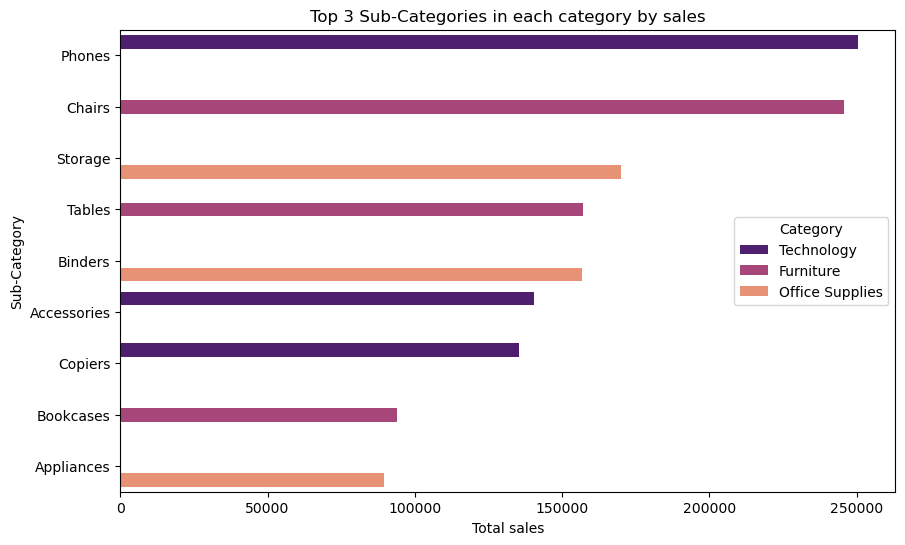

In [21]:
# Get the top 3 sub-categories in each category
top_subcategories = grouped_df.groupby('Category').head(3)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Total sales', y='Sub-category', hue='Category', data=top_subcategories, palette='magma')
plt.title('Top 3 Sub-Categories in each category by sales')
plt.xlabel('Total sales')
plt.ylabel('Sub-Category')
plt.show()

### 2. Generative AI DA

Request ChatGPT to analyze sales by category and sub-category, focusing on trends and outliers.
Compare the AI insights with your Pandas analysis.

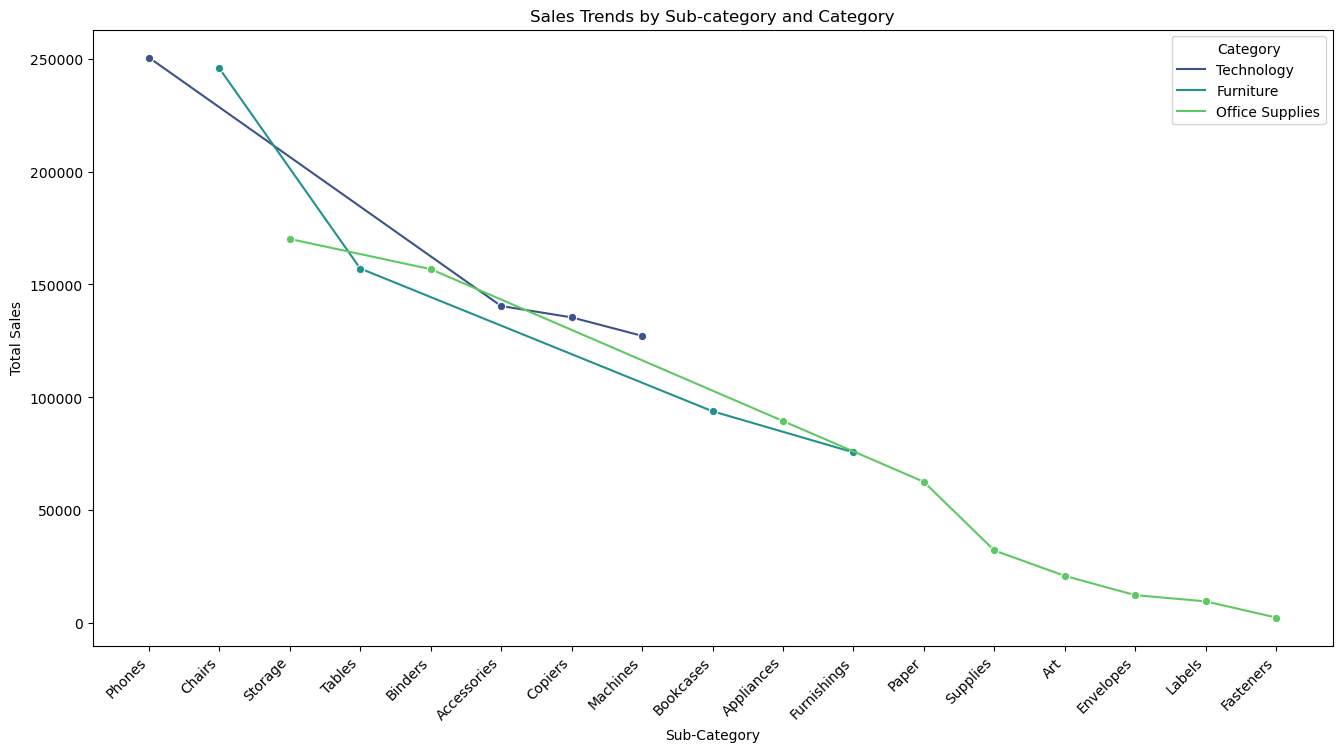

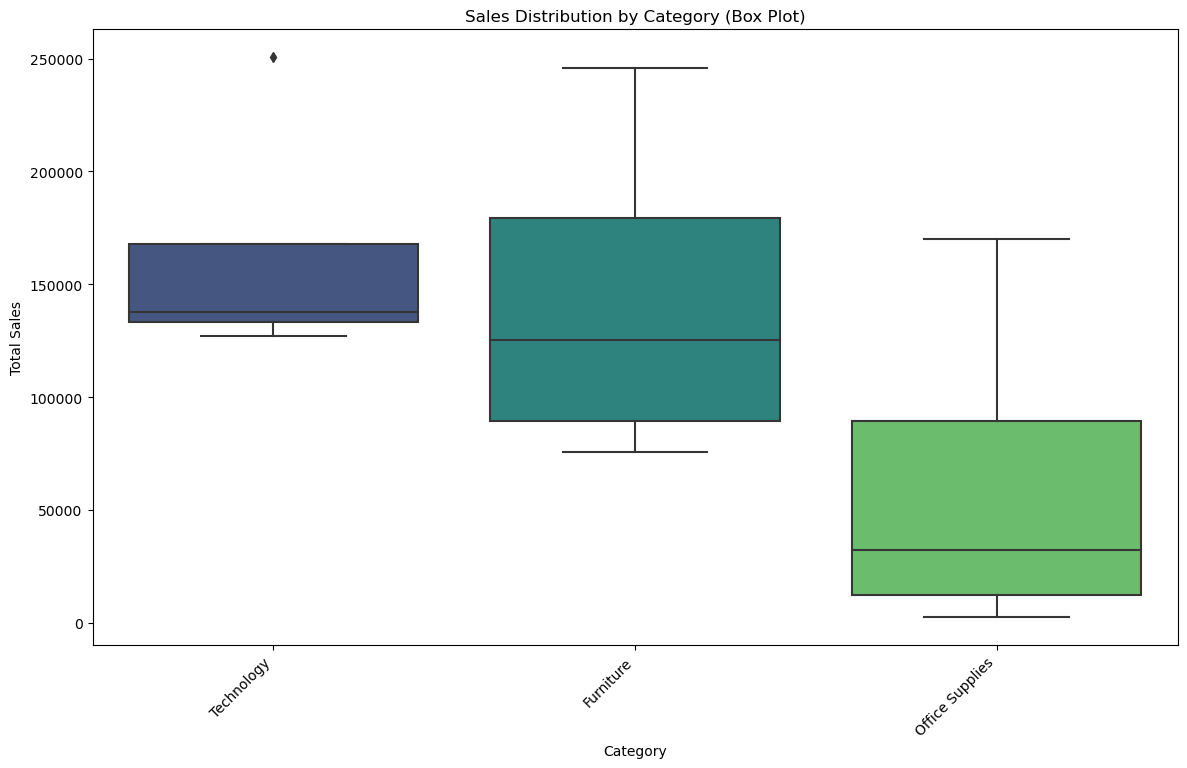

In [24]:
# Plotting Trends (Line Plot)
plt.figure(figsize=(16, 8))
sns.lineplot(x='Sub-category', y='Total sales', hue='Category', data=grouped_df, marker='o', palette='viridis')
plt.title('Sales Trends by Sub-category and Category')
plt.xlabel('Sub-Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Category')
plt.show()

# Plotting Outliers (Box Plot)
plt.figure(figsize=(14, 8))
sns.boxplot(x='Category', y='Total sales', data=grouped_df, palette='viridis')
plt.title('Sales Distribution by Category (Box Plot)')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')
plt.show()

<div style="border:solid green 2px; padding: 20px">
    
Comparing the results of traditional data analysis and Generative AI DA, it can be said that they are complementary. In the summary table, the median and mean values in some categories were very different, indicating outliers. The barplot generated by ChatGPT confirmed the presence of outliers in the Technology category. Lineplot indicates that this product is in the Phones sub-category.

## Exercise 2: Customer Lifetime Value (CLV) Analysis

### 1. Traditional DA

Create a new dataframe summarizing purchase frequency, average purchase value, and total sales per customer.
Calculate CLV for each customer.
Identify top customers by CLV and visualize their contribution.

In [25]:
# Group by customer and calculate purchase frequency, average purchase value, and total sales
customer_summary = filtered_df.groupby('Customer ID').agg(
    purchase_frequency=('Customer ID', 'count'),
    avg_purchase_value=('Sales', 'mean'),
    total_sales=('Sales', 'sum')
).reset_index()

# Calculate CLV based on average purchase value and purchase frequency
customer_summary['CLV'] = customer_summary['avg_purchase_value'] * customer_summary['purchase_frequency']

# Identify top customers by CLV
top_customers = customer_summary.sort_values(by='CLV', ascending=False).head(10)
top_customers

,Customer ID,purchase_frequency,avg_purchase_value,total_sales,CLV
738,TC-20980,8,2303.737500,18429.900,18429.900
619,RB-19360,18,839.852167,15117.339,15117.339
727,TA-21385,6,2301.295000,13807.770,13807.770
6,AB-10105,18,742.550611,13365.911,13365.911
131,CC-12370,11,1102.642909,12129.072,12129.072
680,SE-20110,15,795.913867,11938.708,11938.708
146,CJ-12010,20,558.248700,11164.974,11164.974
326,HL-15040,4,2744.777000,10979.108,10979.108
761,TS-21370,10,1063.914900,10639.149,10639.149
717,SV-20365,28,366.802857,10270.480,10270.480


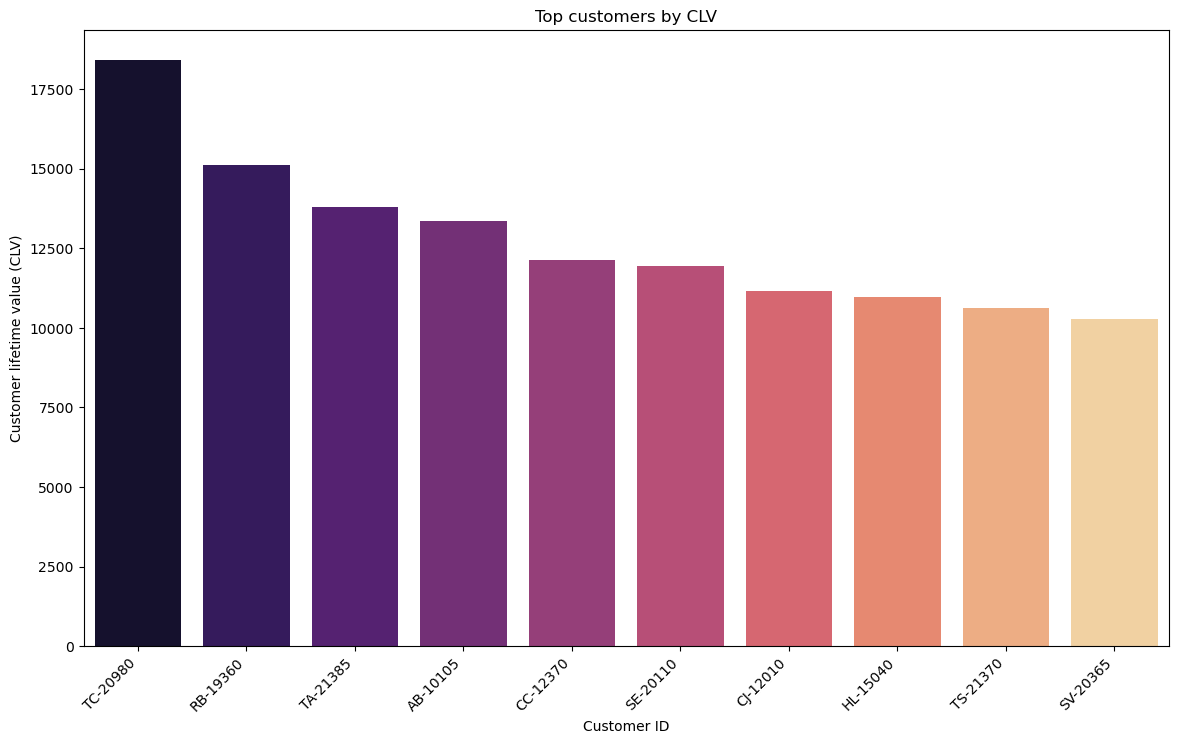

In [26]:
# visualize top customers contribution
plt.figure(figsize=(14, 8))
sns.barplot(x='Customer ID', y='CLV', data=top_customers, palette='magma')
plt.title('Top customers by CLV')
plt.xlabel('Customer ID')
plt.ylabel('Customer lifetime value (CLV)')
plt.xticks(rotation=45, ha='right')
plt.show()

### 2. Generative AI DA

Ask ChatGPT to analyze customer value and purchasing behavior.
Compare AI insights with your CLV analysis.

In [27]:
# Group by 'State' and calculate the sum of 'Sales'
state_sales = filtered_df.groupby('State')['Sales'].sum().reset_index().sort_values(by='Sales', ascending=False)

# Display the result
state_sales

,State,Sales
3,California,356831.3145
30,New York,242015.0800
41,Texas,118433.0436
45,Washington,105335.2740
36,Pennsylvania,96185.1260
20,Michigan,69963.8230
11,Illinois,63459.8260
33,Ohio,61426.0940
8,Florida,54213.5195
31,North Carolina,46545.2230


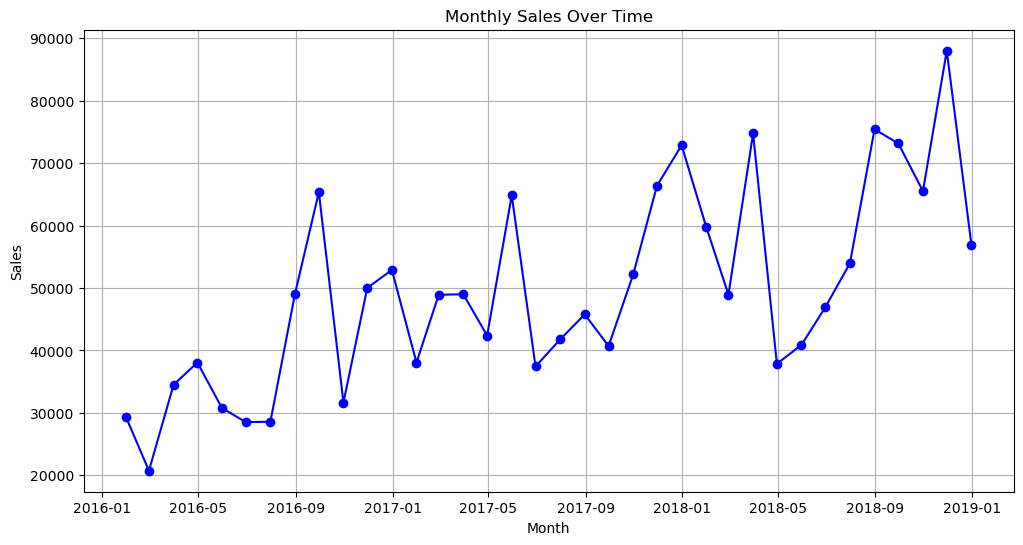

In [32]:
# Set 'Date' as the index
filtered_df.set_index('Order Date', inplace=True)

# Resample the data to monthly frequency and calculate the sum of sales
monthly_sales = filtered_df['Sales'].resample('M').sum()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o', linestyle='-', color='b')
plt.title('Monthly Sales Over Time')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

<div style="border:solid green 2px; padding: 20px">
    
    In general, both types of analysis highlight the same trends. ChatGPT has offered many ideas for researching buying behavior, such as segmentation, clustering, and others.